In [35]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from keras.utils import to_categorical
import numpy as np

In [51]:
# CNN with one Convolutional Layer and one Pooling Layer

from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape


(60000, 28, 28)

In [52]:
# reshape to be [samples][width][height][channels] # channels = 1 for grayscale
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [53]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#convert the target variable into binary categories
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

num_classes = y_test.shape[1] # number of categories

In [62]:
def convolutional_model():
    #create model
    input_shape = (28,28,1)
    model = Sequential()
    model.add(Conv2D(16, (5,5), strides=(1,1), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    #second convolutional and pooling layers
    model.add(Conv2D(8, (2,2),strides=(2,2)))
    model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    #compile model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


In [63]:
#build / fit / evaluate the model
model = convolutional_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: {} \n Error: {}".format(scores[1], 100-scores[1]*100))

Epoch 1/10


/Users/mark/anaconda3/envs/dsfs/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


300/300 - 3s - 10ms/step - accuracy: 0.7714 - loss: 0.7441 - val_accuracy: 0.9232 - val_loss: 0.2650
Epoch 2/10
300/300 - 3s - 9ms/step - accuracy: 0.9319 - loss: 0.2245 - val_accuracy: 0.9507 - val_loss: 0.1654
Epoch 3/10
300/300 - 3s - 9ms/step - accuracy: 0.9518 - loss: 0.1578 - val_accuracy: 0.9607 - val_loss: 0.1334
Epoch 4/10
300/300 - 3s - 9ms/step - accuracy: 0.9607 - loss: 0.1285 - val_accuracy: 0.9631 - val_loss: 0.1184
Epoch 5/10
300/300 - 3s - 9ms/step - accuracy: 0.9666 - loss: 0.1093 - val_accuracy: 0.9681 - val_loss: 0.1020
Epoch 6/10
300/300 - 3s - 9ms/step - accuracy: 0.9690 - loss: 0.0987 - val_accuracy: 0.9717 - val_loss: 0.0931
Epoch 7/10
300/300 - 3s - 8ms/step - accuracy: 0.9723 - loss: 0.0910 - val_accuracy: 0.9750 - val_loss: 0.0793
Epoch 8/10
300/300 - 3s - 8ms/step - accuracy: 0.9746 - loss: 0.0838 - val_accuracy: 0.9770 - val_loss: 0.0731
Epoch 9/10
300/300 - 3s - 9ms/step - accuracy: 0.9752 - loss: 0.0781 - val_accuracy: 0.9760 - val_loss: 0.0757
Epoch 10/10

### Messing around with images

(60000, 28, 28) (60000,)


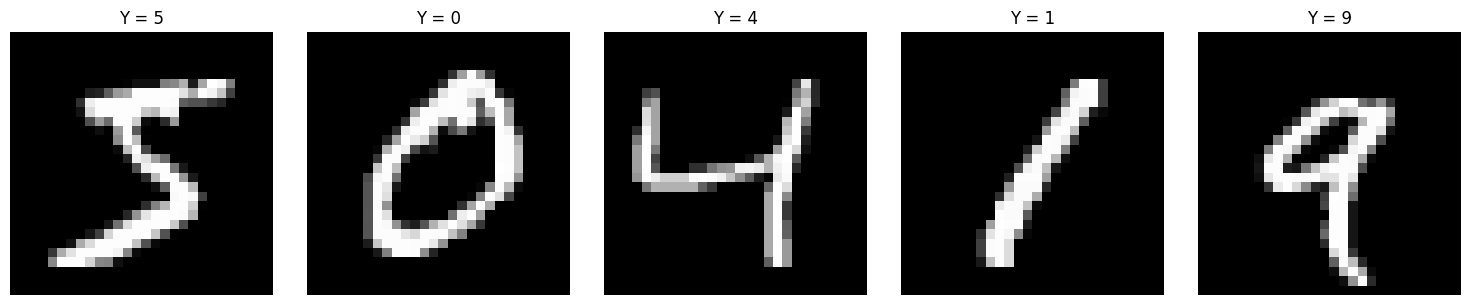

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Create a horizontal row of subplots
fig, axes = plt.subplots(1, num_images, figsize=(15, 3))  # 1 row, num_images columns

for i in range(num_images):
    axes[i].imshow(X_train[i], cmap='gray')  # Display the image
    axes[i].set_title(f"Y = {y_train[i]}")   # Set the title with the label
    axes[i].axis('off')                      # Turn off axes for a cleaner look

plt.tight_layout()
plt.show()


## There should be a lab on VGG and ResNet